# Prediction Using Supervised Machine Learning

## Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error  

## Creating a Dataframe

In [2]:
# Load your dataset
data = pd.read_csv("score.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Info about the Dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the distribution of scores

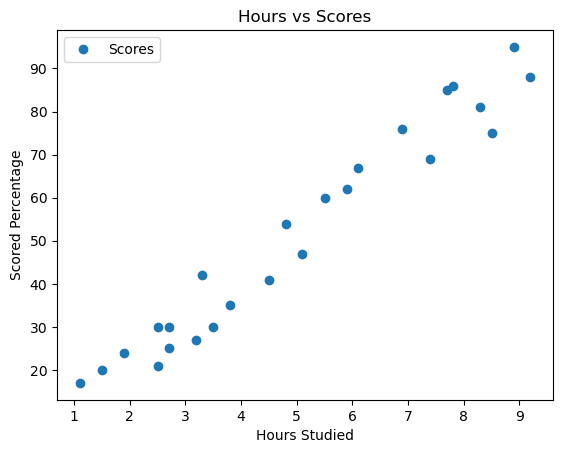

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scored Percentage') 
plt.show()

## Correlation between Hours and Scores

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Splitting Training and Testing the sets

In [8]:
# Split data into features (x) and target variable (y)
x = data.iloc[:,0:1]
y = data.iloc[:,1:] 

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24


## Training the data

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(x_test)
y_pred=np.array(y_pred)
y_pred=y_pred.flatten()
y_test=np.array(y_test)
y_test=y_test.flatten()
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


## Plotting test data

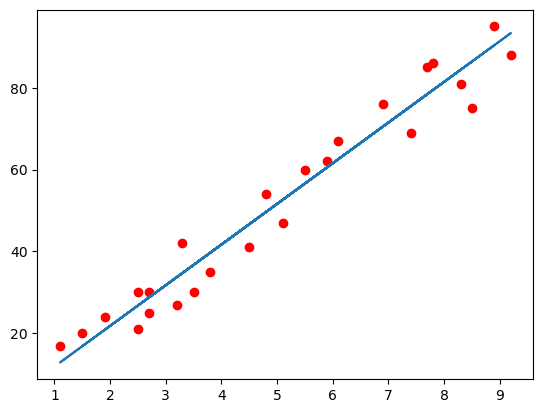

In [13]:
plot_line = lr.coef_*x+lr.intercept_
plt.scatter(x, y, color='red')
plt.plot(x, plot_line);
plt.show()

## Actual and Predicted data

In [14]:
new_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(new_data)

   Actual  Predicted
0      20  16.844722
1      27  33.745575
2      69  75.500624
3      30  26.786400
4      62  60.588106
5      35  39.710582
6      24  20.821393


## R2 score

In [15]:
print("R2 score:",r2_score(y_pred,y_test))

R2 score: 0.9491095995820088


## Mean Squared Error

In [16]:
mean_sqaured_error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mean_sqaured_error}")

Mean Squared Error: 4.5092043283688055


## Predicted Score For Studying After 9.25 Hours

In [ ]:
study_hours = [[9.25]]
pred_score = lr.predict(study_hours)[0][0]
print(f"After 9.25 hours studying, score is: {round(pred_score,2)}")

## After studying 9.25 hours, the score is 93.89%